In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# 正则表达式解析数据
pattern = re.compile(r'(\S+)\s+([-]?\d+\.\d+)\s+([-]?\d+\.\d+)\s+([-]?\d+\.\d+)\s+(.{30})\s+(\d{4})\s+(\d{4})\s+(\d+)')

data = []
for line in response.text.split("\n"):
    match = pattern.match(line)
    if match:
        data.append(match.groups())

# 创建 DataFrame
columns = ["STATION", "lat", "long", "alt", "location", "Start_Year", "End_Year", "Record_Count"]
df = pd.DataFrame(data, columns=columns)

# 清理 Location 字段（去除多余空格）
df["location"] = df["location"].str.strip()

In [18]:
df_station = df

In [45]:
df_station[df_station['location'] == 'kyoto']

Empty DataFrame
Columns: [STATION, lat, long, alt, location, Start_Year, End_Year, Record_Count]
Index: []

In [34]:
df_station

STATION       lat       long     alt  \
0     ACM00078861   17.1170   -61.7830    10.0   
1     AEM00041217   24.4333    54.6500    16.0   
2     AEXUAE05467   25.2500    55.3700     4.0   
3     AFM00040911   36.7000    67.2000   378.0   
4     AFM00040913   36.6667    68.9167   433.0   
...           ...       ...        ...     ...   
2862  ZZXUAICE022  -98.8888  -998.8888  -998.8   
2863  ZZXUAICE026  -98.8888  -998.8888  -998.8   
2864  ZZXUAICE028  -98.8888  -998.8888  -998.8   
2865  ZZXUAICE030  -98.8888  -998.8888  -998.8   
2866  ZZXUAICE031  -98.8888  -998.8888  -998.8   

                            location Start_Year End_Year Record_Count  
0                coolidge field (ua)       1947     1993        13896  
1     abu dhabi international airpor       1983     2025        40534  
2                            sharjah       1935     1942         2477  
3                     mazar-i-sharif       2010     2014         2179  
4                             kunduz       2010     2013         4540  
...                              ...        ...      ...          ...  
2862                            np22       1974     1982         2862  
2863                            np26       1983     1986          824  
2864                            np28       1986     1988          915  
2865                            np30       1988     1990          576  
2866                            np31       1989     1991          717  

[2867 rows x 8 columns]

In [33]:
df_station['location'] = df_station['location'].str.lower()

In [35]:
df_station.to_csv('/content/drive/MyDrive/Projects/Cherry Blossom/CODE/Liestal-Weideli/Data/station_info.csv')

In [23]:
df_jp = pd.read_csv('/content/drive/MyDrive/Projects/Cherry Blossom/CODE/Liestal-Weideli/Data/japan.csv')

In [24]:
df_jp.year.min()

1953

In [25]:
df_jp["location"] = df_jp["location"].str.replace(r'^Japan/', '', regex=True).str.lower()

In [26]:
df_jp

location        lat        long    alt  year  bloom_date  \
0            wakkanai  45.415000  141.678889   2.85  1953  1953-05-30   
1            wakkanai  45.415000  141.678889   2.85  1954  1954-05-27   
2            wakkanai  45.415000  141.678889   2.85  1955  1955-05-23   
3            wakkanai  45.415000  141.678889   2.85  1956  1956-05-14   
4            wakkanai  45.415000  141.678889   2.85  1957  1957-05-22   
...               ...        ...         ...    ...   ...         ...   
6568  minamidaitojima  25.828889  131.228611  15.30  2015  2015-02-13   
6569  minamidaitojima  25.828889  131.228611  15.30  2016  2016-03-01   
6570  minamidaitojima  25.828889  131.228611  15.30  2017  2017-02-14   
6571  minamidaitojima  25.828889  131.228611  15.30  2018  2018-01-29   
6572  minamidaitojima  25.828889  131.228611  15.30  2019  2019-02-12   

      bloom_doy  
0           150  
1           147  
2           143  
3           135  
4           142  
...         ...  
6568         44  
6569         61  
6570         45  
6571         29  
6572         43  

[6573 rows x 7 columns]

In [36]:
df_location = df_jp[['location']].drop_duplicates()

In [37]:
df_id = df_location.merge(df_station, on='location', how='left')

In [39]:
df_id.dropna(inplace=True)

In [41]:
df_id.to_csv('/content/drive/MyDrive/Projects/Cherry Blossom/CODE/Liestal-Weideli/Data/japan_station_info.csv')

In [40]:
df_id

location      STATION      lat      long    alt Start_Year  \
0           wakkanai  JAM00047401  45.4150  141.6789    2.8       1949   
4            sapporo  JAM00047412  43.0600  141.3286   17.5       1949   
7            kushiro  JAM00047418  42.9531  144.4375   14.1       2010   
8             nemuro  JAM00047420  43.3333  145.5833   26.0       1957   
19             akita  JAM00047582  39.7175  140.0992    6.3       1956   
24            sendai  JAM00047590  38.2670  140.9000   43.0       1956   
28            wajima  JAM00047600  37.3914  136.8953    5.2       1956   
30           niigata  JAM00047604  37.9170  139.0500    6.0       1973   
39          maebashi  JAM00047624  36.4000  139.0670  113.0       1973   
57       hachijojima  JAM00047678  33.1217  139.7792  151.2       1958   
59            matsue  JAM00047741  35.4572  133.0656   16.9       2010   
60            yonago  JAM00047744  35.4333  133.3500    6.0       1949   
71             osaka  JAM00047772  34.6830  135.5170   83.0       1947   
74      shionomisaki  JAM00047778  33.4503  135.7572   67.5       1956   
75              nara  MLM00061233  15.1670   -7.2830  271.0       1978   
77           fukuoka  JAM00047807  33.5822  130.3764    2.5       1947   
83         kagoshima  JAM00047827  31.5550  130.5481    3.9       1956   
94   naze/funchatoge  JAM00047909  28.3942  129.5528  294.1       1957   
97      ishigakijima  JAM00047918  24.3367  124.1644    5.7       1964   
100             naha  JAM00047936  26.2000  127.6830   27.0       1973   
102  minamidaitojima  JAM00047945  25.8289  131.2286   15.3       1961   

    End_Year Record_Count  
0       2025        73376  
4       2025        74771  
7       2024         8794  
8       2010        57940  
19      2025        70008  
24      2008        57673  
28      2025        68662  
30      1990         2033  
39      1990         5175  
57      2025        65897  
59      2025         9827  
60      2010        60134  
71      1992         7833  
74      2025        68791  
75      1991         9645  
77      2025        78829  
83      2025        70174  
94      2025        69089  
97      2025        63516  
100     2008        45567  
102     2025        65590

In [5]:
import requests
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import re

In [ ]:
  # "washingtondc" = "GHCND:USW00013743", done
  # "vancouver"    = "GHCND:CA001108395", left 2000+
  # "newyorkcity"  = "GHCND:USW00014732",
  # "liestal"      = "GHCND:SZ000001940", done
  # "kyoto"        = "GHCND:JA000047759" done

In [42]:
df_list = []

In [43]:
for index, row in df_id.iterrows():
  # API 请求参数
  base_url = "https://www.ncei.noaa.gov/access/services/data/v1"
  params = {
      "dataset": "daily-summaries",
      "stations": f"{row['STATION']}",  # 目标站点
      "datatypeid": ["TMAX", "TMIN", "TAVG", "PRCP", "RHUM", "SUNH", "SNOW"],
      "startDate": "1950-01-01", # "2000-01-01", "1900-01-01"
      "endDate": "2025-2-21", # "1999-12-31", "2025-2-24"
      "format": "json"
  }

  # 发送请求
  response = requests.get(base_url, params=params)

  if response.status_code == 200:
      data = response.json()
      df = pd.DataFrame(data)
  else:
    print(response.status_code)
  df_list.append(df)

400
400
400
400
400


KeyboardInterrupt: 

In [ ]:
df_list = []

In [ ]:
df_list.append(df[['DATE', 'STATION', 'TMAX', 'TAVG', 'PRCP', 'TMIN', 'SNWD']])

In [ ]:
df = pd.concat(df_list, ignore_index=True)
df.sort_values(by=['STATION', 'DATE'], inplace=True)
df.reset_index(inplace=True)
df.drop(columns='index', inplace=True)

In [ ]:
df

DATE      STATION  TMAX  TMIN  PRCP  TAVG  SNWD
0       1957-01-06  CA001108395   NaN   6.0  20.0  23.0   NaN
1       1957-01-07  CA001108395  56.0  11.0  61.0  44.0   NaN
2       1957-01-08  CA001108395  56.0  11.0  89.0  23.0   NaN
3       1957-01-09  CA001108395  28.0   NaN   3.0 -29.0   NaN
4       1957-01-10  CA001108395   NaN  -6.0  99.0   8.0   NaN
...            ...          ...   ...   ...   ...   ...   ...
107535  2025-02-17  USW00014732  33.0 -27.0   0.0  19.0   0.0
107536  2025-02-18  USW00014732 -21.0 -66.0   0.0 -36.0   0.0
107537  2025-02-19  USW00014732  -5.0 -77.0   0.0 -46.0   0.0
107538  2025-02-20  USW00014732 -10.0 -71.0   0.0 -43.0   0.0
107539  2025-02-21  USW00014732  17.0 -56.0   0.0 -27.0   0.0

[107540 rows x 7 columns]

In [ ]:
df_list = [df_weather, df_weather1]

In [ ]:
df.STATION.unique()

array(['CA001108395', 'JA000047759', 'USW00013743', 'USW00014732'],
      dtype=object)

In [ ]:
# Check available columns
print("Columns before processing:", df.columns)

# Ensure 'DATE' column is in datetime format
df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce")

# Sort by date
df = df.sort_values(by='DATE', ascending=False).reset_index(drop=True)

# Drop unnecessary columns if they exist
cols_to_drop = ['TAVG', 'SNWD']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')

# Fill missing precipitation values
if 'PRCP' in df.columns:
    df['PRCP'].fillna(0, inplace=True)

# Convert temperature values from tenths of a degree to degrees
for col in ['TMAX', 'TMIN', 'TAVG']:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: int(x) / 10 if pd.notna(x) else x)

# Function to fill missing temperature values
def fill_missing_tmax(df, column="TMAX", window=7):
    df_filled = df.copy()
    if column not in df_filled.columns:
        return df_filled  # Skip if column does not exist

    nan_indices = df_filled[df_filled[column].isna()].index

    for idx in nan_indices:
        start = max(idx - window, 0)
        end = min(idx + window + 1, len(df_filled))
        window_values = df_filled[column].iloc[start:end].dropna().values
        if len(window_values) > 0:
            df_filled.at[idx, column] = np.mean(window_values)

    return df_filled

# Apply missing value filling
df = fill_missing_tmax(df, column="TMAX", window=7)
df = fill_missing_tmax(df, column="TMIN", window=7)

# Final DataFrame check
print("Columns after processing:", df.columns)

Columns before processing: Index(['DATE', 'STATION', 'TMAX', 'TMIN', 'PRCP', 'TAVG', 'SNWD', 'year'], dtype='object')


<ipython-input-83-fad0c958e581>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PRCP'].fillna(0, inplace=True)


Columns after processing: Index(['DATE', 'STATION', 'TMAX', 'TMIN', 'PRCP', 'year'], dtype='object')


In [ ]:
df

DATE      STATION       TMAX       TMIN  PRCP  year
0      2025-02-22  USW00013743   5.600000  -0.314286   0.0  2025
1      2025-02-21  USW00014732   1.700000  -5.600000   0.0  2025
2      2025-02-21  CA001108395   8.700000   5.500000  25.0  2025
3      2025-02-21  JA000047759   7.000000  -0.200000   0.0  2025
4      2025-02-21  USW00013743   5.000000  -2.700000   0.0  2025
...           ...          ...        ...        ...   ...   ...
107535 1936-09-05  USW00013743  24.514026  15.969218   0.0  1936
107536 1936-09-04  USW00013743  24.514026  15.969218   0.0  1936
107537 1936-09-03  USW00013743  24.514026  15.969218   0.0  1936
107538 1936-09-02  USW00013743  24.514026  15.969218   0.0  1936
107539 1936-09-01  USW00013743  24.514026  15.969218   0.0  1936

[107540 rows x 6 columns]

In [ ]:
df = df[~((df['STATION'] == 'CA001108395') & (df['year'] < 1977))]

In [ ]:
df

DATE      STATION       TMAX       TMIN  PRCP  year
0      2025-02-22  USW00013743   5.600000  -0.314286   0.0  2025
1      2025-02-21  USW00014732   1.700000  -5.600000   0.0  2025
2      2025-02-21  CA001108395   8.700000   5.500000  25.0  2025
3      2025-02-21  JA000047759   7.000000  -0.200000   0.0  2025
4      2025-02-21  USW00013743   5.000000  -2.700000   0.0  2025
...           ...          ...        ...        ...   ...   ...
107535 1936-09-05  USW00013743  24.514026  15.969218   0.0  1936
107536 1936-09-04  USW00013743  24.514026  15.969218   0.0  1936
107537 1936-09-03  USW00013743  24.514026  15.969218   0.0  1936
107538 1936-09-02  USW00013743  24.514026  15.969218   0.0  1936
107539 1936-09-01  USW00013743  24.514026  15.969218   0.0  1936

[106897 rows x 6 columns]

In [ ]:
file_path = '/content/drive/MyDrive/Projects/Cherry Blossom/CODE/Liestal-Weideli/Data/liestal_weather.csv'
df2 = pd.read_csv(file_path)

In [ ]:
df2['STATION'] = 'SZ000001940'

In [ ]:
df2

DATE      TMAX       TMIN  PRCP      STATION
0      2025-02-18  3.900000  -0.600000     0  SZ000001940
1      2025-02-17  3.500000   0.700000     0  SZ000001940
2      2025-02-16  4.500000  -0.700000     0  SZ000001940
3      2025-02-15  3.900000  -2.800000     0  SZ000001940
4      2025-02-14  6.611111   1.066667    89  SZ000001940
...           ...       ...        ...   ...          ...
45335  1901-01-05 -5.500000 -13.500000     0  SZ000001940
45336  1901-01-04 -4.500000 -11.500000     0  SZ000001940
45337  1901-01-03 -3.000000  -7.000000     0  SZ000001940
45338  1901-01-02  0.000000  -4.000000    25  SZ000001940
45339  1901-01-01  7.500000  -1.000000    22  SZ000001940

[45340 rows x 5 columns]

In [ ]:
df = pd.concat([df, df2], ignore_index=True)
df.sort_values(by=['DATE', 'STATION'], inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['year', 'index'], inplace=True)

In [ ]:
df

DATE      STATION       TMAX       TMIN  PRCP
0       1936-09-01 00:00:00  USW00013743  24.514026  15.969218   0.0
1       1936-09-02 00:00:00  USW00013743  24.514026  15.969218   0.0
2       1936-09-03 00:00:00  USW00013743  24.514026  15.969218   0.0
3       1936-09-04 00:00:00  USW00013743  24.514026  15.969218   0.0
4       1936-09-05 00:00:00  USW00013743  24.514026  15.969218   0.0
...                     ...          ...        ...        ...   ...
152232           2025-02-14  SZ000001940   6.611111   1.066667  89.0
152233           2025-02-15  SZ000001940   3.900000  -2.800000   0.0
152234           2025-02-16  SZ000001940   4.500000  -0.700000   0.0
152235           2025-02-17  SZ000001940   3.500000   0.700000   0.0
152236           2025-02-18  SZ000001940   3.900000  -0.600000   0.0

[152237 rows x 5 columns]

In [ ]:
df.to_csv('/content/drive/MyDrive/Projects/Cherry Blossom/CODE/Liestal-Weideli/Data/final_weather.csv', index=False)

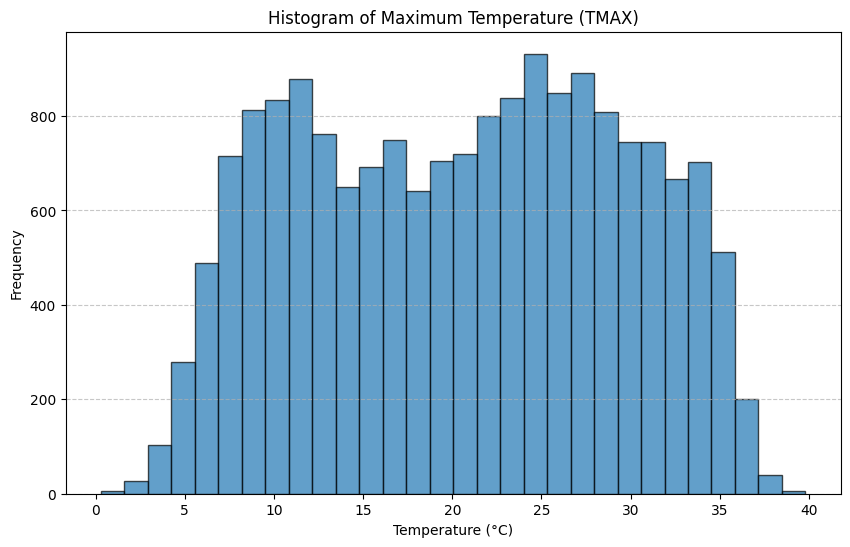

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 读取数据（假设数据已经获取并存入 DataFrame df）
# df = pd.read_csv("noaa_data.csv")  # 如果数据来自 CSV 文件

# 确保 DATE 是 datetime 格式
df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce")

# 绘制温度的直方图（TMAX）
plt.figure(figsize=(10, 6))
plt.hist(df["TMAX"].dropna(), bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Histogram of Maximum Temperature (TMAX)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
  # "washingtondc" = "GHCND:USW00013743", done
  # "vancouver"    = "GHCND:CA001108395", left 2000+
  # "newyorkcity"  = "GHCND:USW00014732",
  # "liestal"      = "GHCND:SZ000001940", done
  # "kyoto"        = "GHCND:JA000047759" done

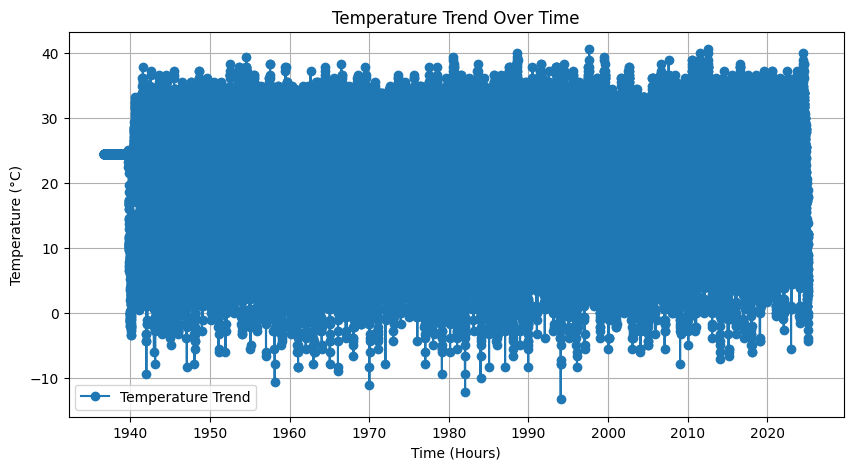

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df_filtered = df.dropna(subset=['TMAX'])
# Plot temperature trend
plt.figure(figsize=(10, 5))
plt.plot(df_filtered[df_filtered.STATION == 'USW00013743']['DATE'], df_filtered[df_filtered.STATION == 'USW00013743']['TMAX'], marker='o', linestyle='-', label="Temperature Trend")
plt.xlabel("Time (Hours)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trend Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df[(df.STATION == 'CA001108395') & (df.year > 1970)]

DATE      STATION       TMAX       TMIN  PRCP  year
2     2025-02-21  CA001108395   8.700000   5.500000  25.0  2025
6     2025-02-20  CA001108395   9.700000   5.900000  10.0  2025
9     2025-02-19  CA001108395   9.900000   4.100000  89.0  2025
16    2025-02-18  CA001108395   6.066667  -2.222308   0.0  2025
18    2025-02-17  CA001108395   6.051282  -2.692937  36.0  2025
...          ...          ...        ...        ...   ...   ...
68506 1977-07-05  CA001108395  17.000000  10.000000  30.0  1977
68509 1977-07-04  CA001108395  16.000000  10.000000  20.0  1977
68513 1977-07-03  CA001108395  18.000000  11.000000  30.0  1977
68516 1977-07-02  CA001108395  20.000000  13.000000  10.0  1977
68522 1977-07-01  CA001108395  22.000000  10.000000   0.0  1977

[17023 rows x 6 columns]

<ipython-input-92-56b488c11c8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'])


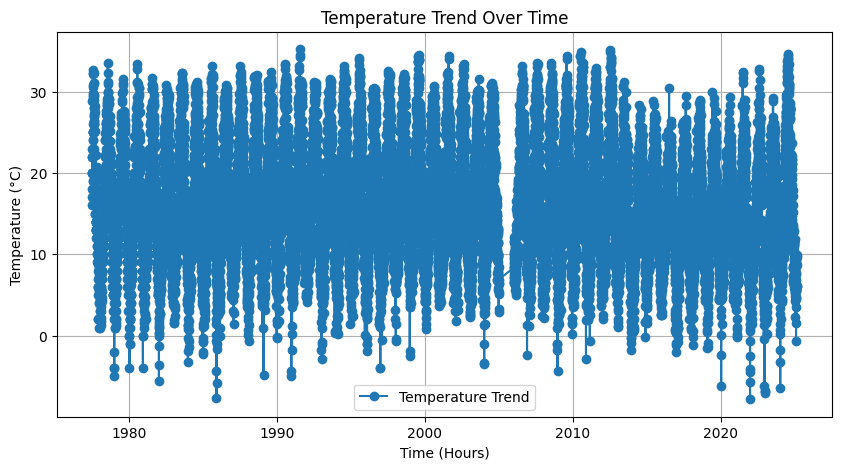

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df_filtered = df.dropna(subset=['TMAX'])
# Plot temperature trend
plt.figure(figsize=(10, 5))
plt.plot(df_filtered[df_filtered.STATION == 'CA001108395']['DATE'],
         df_filtered[df_filtered.STATION == 'CA001108395']['TMAX'],
         marker='o', linestyle='-', label="Temperature Trend")
plt.xlabel("Time (Hours)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trend Over Time")
plt.legend()
plt.grid(True)
plt.show()

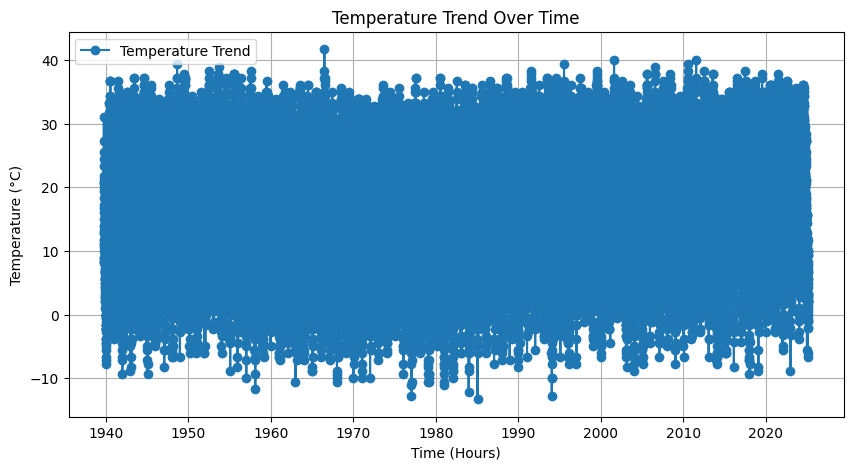

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df_filtered = df.dropna(subset=['TMAX'])
# Plot temperature trend
plt.figure(figsize=(10, 5))
plt.plot(df_filtered[df_filtered.STATION == 'USW00014732']['DATE'],
         df_filtered[df_filtered.STATION == 'USW00014732']['TMAX'],
         marker='o', linestyle='-', label="Temperature Trend")
plt.xlabel("Time (Hours)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trend Over Time")
plt.legend()
plt.grid(True)
plt.show()

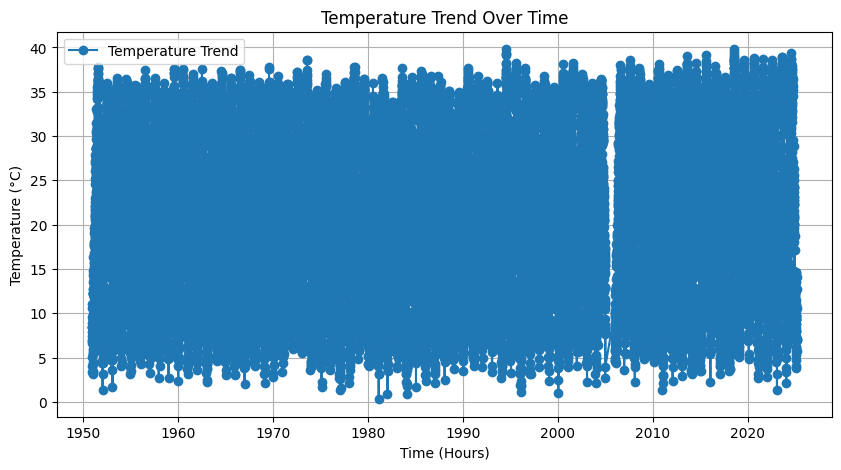

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df_filtered = df.dropna(subset=['TMAX'])
# Plot temperature trend
plt.figure(figsize=(10, 5))
plt.plot(df_filtered[df_filtered.STATION == 'JA000047759']['DATE'],
         df_filtered[df_filtered.STATION == 'JA000047759']['TMAX'],
         marker='o', linestyle='-', label="Temperature Trend")
plt.xlabel("Time (Hours)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trend Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
path = "/content/drive/MyDrive/Kyoto/Data/"
print("Files in directory:", os.listdir(path))

Files in directory: ['Kyoto_weather.csv']


In [ ]:
file_path = '/content/drive/MyDrive/Kyoto/Data/kyoto.csv'
df_cherry = pd.read_csv(file_path)
df_cherry.rename(columns={'bloom_date': 'DATE'}, inplace=True)
df_cherry["DATE"] = pd.to_datetime(df_cherry["DATE"], errors="coerce")

<ipython-input-52-092318d413b6>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cherry["DATE"] = pd.to_datetime(df_cherry["DATE"], errors="coerce")


In [ ]:
df_cherry.columns

Index(['location', 'lat', 'long', 'alt', 'year', 'DATE', 'bloom_doy'], dtype='object')

In [ ]:
df_cherry[['location', 'year', 'DATE', 'bloom_doy']]

location  year       DATE  bloom_doy
0      kyoto   812        NaT         92
1      kyoto   815        NaT        105
2      kyoto   831        NaT         96
3      kyoto   851        NaT        108
4      kyoto   853        NaT        104
..       ...   ...        ...        ...
831    kyoto  2020 2020-04-01         92
832    kyoto  2021 2021-03-26         85
833    kyoto  2022 2022-04-01         91
834    kyoto  2023 2023-03-25         84
835    kyoto  2024 2024-04-04         95

[836 rows x 4 columns]